# One vs rest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [3]:
def optimizar(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    theta = (1/m)*(x_train.T @ (sigma-y_train))
    return theta

In [4]:
def costo(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    error = (y_train*np.log(sigma) + (1-y_train)*np.log(1-sigma))
    return np.sum(error, axis= 0)

In [5]:
iris = datasets.load_iris()

In [6]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)

In [7]:

for i in range(x.shape[1]):
    max = x[:,i].max()
    min = x[:,i].min()
    x[:,i] = (x[:,i] - min)/(max - min)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [9]:
X_b = np.c_[np.ones((len(x_train),1)), x_train]
x_test = np.c_[np.ones((len(x_test),1)), x_test]

In [10]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
theta_setosa = np.random.randn(5).reshape(5,1)
theta_setosa

array([[ 1.17300409],
       [-0.82169559],
       [ 2.14799919],
       [ 1.70033468],
       [ 1.81806845]])

In [12]:
eta = 0.8
n_iter = 10000

J_set = np.zeros(n_iter)
m = len(x_train)
y_train_set = (y_train == 0).astype(int)
for i in range(n_iter):
    J_set[i] = -(1/m)*costo(theta_setosa, X_b, y_train_set)
    theta_setosa = theta_setosa - eta * optimizar(theta_setosa, X_b, y_train_set)
theta_setosa

array([[  3.32032017],
       [ -6.0226733 ],
       [ 10.11198158],
       [-10.66159177],
       [-10.39152229]])

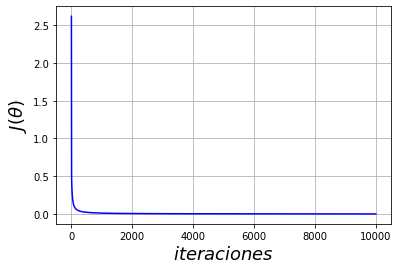

In [13]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [14]:
y_proba_set =np.round(sigmoid(theta_setosa.T @ x_test.T),2)
y_proba_set

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.  ,
        0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  ,
        1.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  ,
        1.  , 1.  , 1.  , 0.  , 0.  ]])

In [15]:
theta_versicolor = np.random.randn(5).reshape(5,1)
theta_versicolor

array([[-1.78478348],
       [ 0.61093655],
       [-1.53231391],
       [-0.87942856],
       [-0.79867722]])

In [16]:
eta = 0.8
n_iter = 10000

J_vers = np.zeros(n_iter)

y_train_ver = (y_train == 1).astype(int)
for i in range(n_iter):
    J_vers[i] = -(1/m)*costo(theta_versicolor, X_b, y_train_ver)
    theta_versicolor = theta_versicolor - eta * optimizar(theta_versicolor, X_b, y_train_ver)
theta_versicolor

array([[ 1.5877999 ],
       [-0.94876401],
       [-6.40039702],
       [ 8.92246967],
       [-7.64480232]])

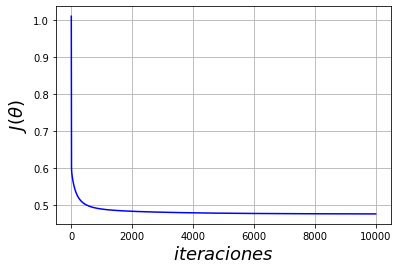

In [17]:
plt.plot(np.arange(n_iter), J_vers, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [18]:
y_proba_ver =np.round(sigmoid(theta_versicolor.T @ x_test.T),2)
y_proba_ver

array([[0.91, 0.76, 0.34, 0.66, 0.05, 0.45, 0.54, 0.49, 0.63, 0.65, 0.81,
        0.33, 0.05, 0.14, 0.16, 0.67, 0.13, 0.26, 0.65, 0.1 , 0.46, 0.38,
        0.  , 0.47, 0.44, 0.77, 0.6 , 0.26, 0.25, 0.06, 0.16, 0.02, 0.3 ,
        0.09, 0.06, 0.17, 0.51, 0.09]])

In [19]:
theta_virginica = np.random.randn(5).reshape(5,1)
theta_virginica

array([[-1.61144697],
       [ 0.84844076],
       [-1.51514666],
       [ 1.21707745],
       [ 0.55706993]])

In [20]:
eta = 0.8
n_iter = 10000

J_vir = np.zeros(n_iter)

y_train_vir = (y_train == 2).astype(int)
for i in range(n_iter):
    J_vir[i] = -(1/m)*costo(theta_virginica, X_b, y_train_vir)
    theta_virginica = theta_virginica - eta * optimizar(theta_virginica, X_b, y_train_vir)
theta_virginica

array([[-21.51093295],
       [ -2.19272789],
       [ -7.88434753],
       [ 15.91859085],
       [ 22.8440233 ]])

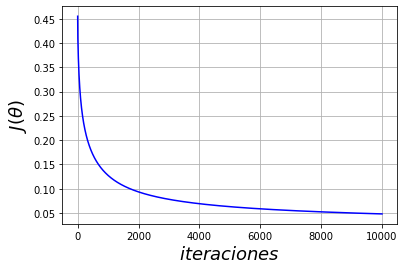

In [21]:
plt.plot(np.arange(n_iter), J_vir, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [22]:
y_proba_vir = np.round(sigmoid(theta_virginica.T @ x_test.T),2)
y_proba_vir

array([[0.55, 1.  , 0.01, 0.27, 1.  , 0.  , 0.04, 0.01, 0.  , 0.99, 0.  ,
        0.81, 1.  , 0.  , 0.  , 0.62, 0.  , 0.  , 0.  , 0.  , 0.01, 0.87,
        0.  , 0.  , 0.02, 0.02, 0.01, 0.69, 1.  , 0.  , 0.  , 0.  , 0.04,
        0.  , 0.  , 0.  , 0.97, 1.  ]])

In [23]:
compar = np.concatenate((y_proba_set, y_proba_ver, y_proba_vir), axis =0).T
compar

array([[0.  , 0.91, 0.55],
       [0.  , 0.76, 1.  ],
       [0.  , 0.34, 0.01],
       [0.  , 0.66, 0.27],
       [0.  , 0.05, 1.  ],
       [0.  , 0.45, 0.  ],
       [0.  , 0.54, 0.04],
       [0.  , 0.49, 0.01],
       [0.94, 0.63, 0.  ],
       [0.  , 0.65, 0.99],
       [0.  , 0.81, 0.  ],
       [0.  , 0.33, 0.81],
       [0.  , 0.05, 1.  ],
       [1.  , 0.14, 0.  ],
       [1.  , 0.16, 0.  ],
       [0.  , 0.67, 0.62],
       [1.  , 0.13, 0.  ],
       [1.  , 0.26, 0.  ],
       [0.  , 0.65, 0.  ],
       [1.  , 0.1 , 0.  ],
       [0.  , 0.46, 0.01],
       [0.  , 0.38, 0.87],
       [1.  , 0.  , 0.  ],
       [0.02, 0.47, 0.  ],
       [0.  , 0.44, 0.02],
       [0.  , 0.77, 0.02],
       [0.  , 0.6 , 0.01],
       [0.  , 0.26, 0.69],
       [0.  , 0.25, 1.  ],
       [1.  , 0.06, 0.  ],
       [1.  , 0.16, 0.  ],
       [1.  , 0.02, 0.  ],
       [0.  , 0.3 , 0.04],
       [1.  , 0.09, 0.  ],
       [1.  , 0.06, 0.  ],
       [1.  , 0.17, 0.  ],
       [0.  , 0.51, 0.97],
 

In [24]:

prediction_final = []
for i in range(len(compar)):
    #print(compar[i])
    valor_max = compar[i].max()
    #print(compar[i].max())
    if compar[i][0] == valor_max:
        prediction_final.append(0)
    elif compar[i][1] == valor_max:
        prediction_final.append(1)
    elif compar[i][2] == valor_max:
        prediction_final.append(2)
prediction_final =np.array(prediction_final).reshape(1, len(prediction_final))


In [25]:
last_data = np.concatenate((y_proba_set, y_proba_ver, y_proba_vir, prediction_final, y_test.reshape(1, len(y_test)) ), axis =0).T
last_data

array([[0.  , 0.91, 0.55, 1.  , 2.  ],
       [0.  , 0.76, 1.  , 2.  , 2.  ],
       [0.  , 0.34, 0.01, 1.  , 1.  ],
       [0.  , 0.66, 0.27, 1.  , 2.  ],
       [0.  , 0.05, 1.  , 2.  , 2.  ],
       [0.  , 0.45, 0.  , 1.  , 1.  ],
       [0.  , 0.54, 0.04, 1.  , 1.  ],
       [0.  , 0.49, 0.01, 1.  , 1.  ],
       [0.94, 0.63, 0.  , 0.  , 0.  ],
       [0.  , 0.65, 0.99, 2.  , 2.  ],
       [0.  , 0.81, 0.  , 1.  , 1.  ],
       [0.  , 0.33, 0.81, 2.  , 2.  ],
       [0.  , 0.05, 1.  , 2.  , 2.  ],
       [1.  , 0.14, 0.  , 0.  , 0.  ],
       [1.  , 0.16, 0.  , 0.  , 0.  ],
       [0.  , 0.67, 0.62, 1.  , 1.  ],
       [1.  , 0.13, 0.  , 0.  , 0.  ],
       [1.  , 0.26, 0.  , 0.  , 0.  ],
       [0.  , 0.65, 0.  , 1.  , 1.  ],
       [1.  , 0.1 , 0.  , 0.  , 0.  ],
       [0.  , 0.46, 0.01, 1.  , 1.  ],
       [0.  , 0.38, 0.87, 2.  , 2.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.47, 0.  , 1.  , 1.  ],
       [0.  , 0.44, 0.02, 1.  , 1.  ],
       [0.  , 0.77, 0.02,

In [26]:
cm = confusion_matrix(y_test, prediction_final.flatten())
cm

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 10]], dtype=int64)

In [27]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total

0.9473684210526315

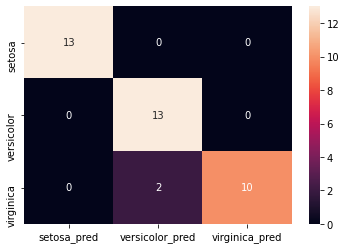

In [28]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
f = sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [29]:
print(classification_report(y_test,  prediction_final.flatten(), target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38

